# GRU

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import random

# Set seed

In [2]:
random.seed(10)

# Load Data

In [3]:
df = pd.read_csv('aggregate_data_daily.csv')
df1 = df['close']
df1

0       131288.958237
1       131832.877280
2       129468.922827
3       129249.723173
4       127985.717387
            ...      
1764    257670.968933
1765    259022.745291
1766    258462.879837
1767    259788.447905
1768    260920.830000
Name: close, Length: 1769, dtype: float64

In [4]:
df1_max = max(df['close'])
df1_min = min(df['close'])

# Data Preprocessing

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
training_size=int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [7]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Train/Test Split

In [8]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_train2, y_train2 = X_train, y_train
X_test, y_test = create_dataset(test_data, time_step)
X_test2, y_test2 = X_test, y_test

In [9]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [10]:
X_train.shape[1]

100

# Model

In [11]:
# create and fit the GRU network
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,089
Trainable params: 17,089
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
18/18 [==============================] - 3s 33ms/step - loss: 0.0468
Epoch 2/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0321
Epoch 3/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0235
Epoch 4/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0193
Epoch 5/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0165
Epoch 6/20
18/18 [==============================] - 1s 36ms/step - loss: 0.0150
Epoch 7/20
18/18 [==============================] - 1s 36ms/step - loss: 0.0122
Epoch 8/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0118
Epoch 9/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0110
Epoch 10/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0102
Epoch 11/20
18/18 [==============================] - 1s 36ms/step - loss: 0.0093
Epoch 12/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0088
Epoch 13/20
18/18 [==================

# Prediction

In [14]:
test_predict = model.predict(X_test)

14/14 [==============================] - 1s 7ms/step


In [15]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.011460115963030648
R2 -0.29214795415042794


In [16]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

36/36 [==============================] - 0s 7ms/step


In [17]:
train_predict

array([[130966.03],
       [131478.28],
       [131062.85],
       ...,
       [167148.08],
       [166873.12],
       [166670.72]], dtype=float32)

In [18]:
y_test2 = (y_test * (df1_max - df1_min)) + df1_min
y_test2

array([212623.20093333, 213318.26721763, 212244.01336898, 213349.14704301,
       213969.64786667, 214112.87293333, 215857.47090164, 216456.52173913,
       215983.80912807, 213786.59572193, 208875.80266667, 212653.91720867,
       214041.55683646, 215754.95253333, 215925.0296    , 216546.41136364,
       217432.04786096, 217986.16567568, 218850.20533333, 219469.76253333,
       221093.4684492 , 222471.7925876 , 224561.70672043, 225995.0792    ,
       227105.62866848, 226500.6884    , 226211.16420912, 225811.15773333,
       227301.26085165, 225079.86029412, 223125.14213333, 219781.72426667,
       217053.37226667, 216628.18221925, 217799.27372654, 228009.79933155,
       231188.44933155, 233093.03853333, 234692.42053333, 237689.6407754 ,
       239275.55374332, 237537.37386667, 238891.24946524, 239135.00201072,
       241629.90546667, 241744.8355615 , 239771.94758065, 238413.60215054,
       235920.59108108, 232230.21724599, 231154.19173333, 232683.56984127,
       235172.74      , 2

In [19]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')
print(f'MAE {math.sqrt(mean_squared_error(y_test2, test_predict))}')

MSE 330421835.8681083
R2 -0.29214737750005715
MAE 18177.509066649047


In [20]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

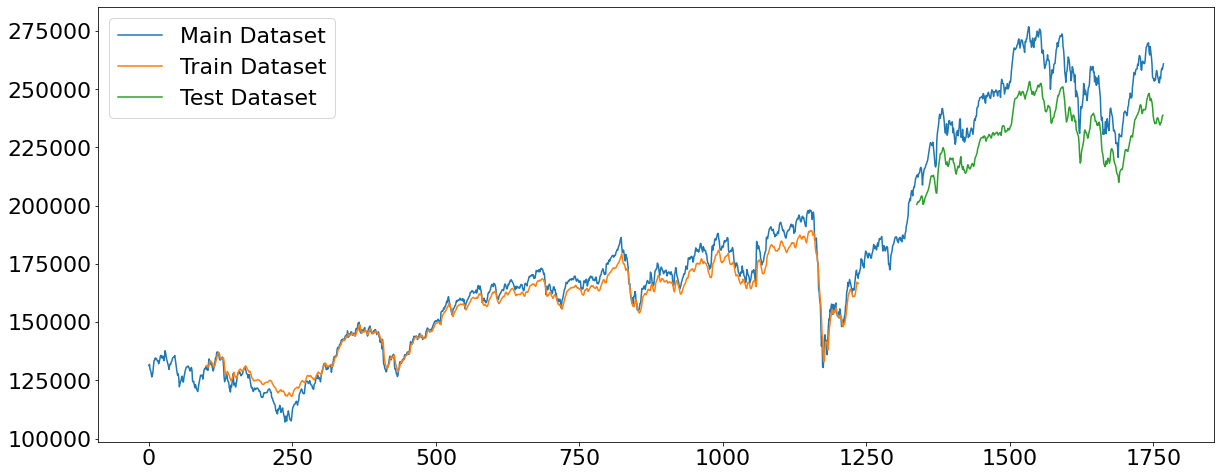

In [21]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()